<a href="https://colab.research.google.com/github/DLesmes/ML_NN_Sk/blob/main/NN_from_Sk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requeriments

In [1]:
import numpy as np
import modin.pandas as pd
#import pandas as pd
import matplotlib.pyplot     as plt
import seaborn  as sns

from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

## Load Data (Alomarrano)

In [2]:
df = pd.read_csv("/mnt/workstation/data/Alomarrano/littlepig_full_ok.csv")
id_cli = df['id_registro']
#df = df.drop(['id_registro'], axis=1)
df

,periodo,fecha_nacimiento,edad,ult_actual,categoria,codigo_ciiu,ind_mora_vigente,cartera_castigada,mora_max,cant_moras_30_ult_12_meses,...,estado_civil,nivel_academico,profesion,ocupacion,ciudad_residencia,rep_calif_cred,genero,id_registro,anho,mes
0,201908,19840630,35,20180526,1.0,10,1,1,0,0,...,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2089776#201908,2019,8
1,201909,19840630,35,20180526,1.0,10,1,1,0,0,...,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2089776#201909,2019,9
2,201907,19840630,35,20180526,1.0,10,1,1,0,0,...,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2089776#201907,2019,7
3,201903,19840630,35,20180526,1.0,10,1,1,0,0,...,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2089776#201903,2019,3
4,201911,19840630,35,20180526,1.0,10,1,1,0,0,...,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2089776#201911,2019,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527188,202011,19740415,47,20201010,2.0,10,1,1,0,0,...,SOLTERO,UNIVERSITARIO,OTROS,Empleado,PUERRES,A,F,8596193#202011,2020,11
9527189,202011,19850620,35,20201003,3.0,90,1,1,28,0,...,DIVORCIADO,UNIVERSITARIO,CARRERA MILITAR,Empleado,PEDRAZA,C,M,8616083#202011,2020,11
9527190,202011,19740316,47,20200616,3.0,10,1,1,23,0,...,DIVORCIADO,UNIVERSITARIO,QUIMICA FARMACEUTICA,Independiente,MURILLO,D,M,8670207#202011,2020,11
9527191,202011,19780722,42,20200423,2.0,10,1,1,0,0,...,CASADO,ESPECIALIZACION,ECONOMIA,Empleado,PUERRES,B,F,8677655#202011,2020,11


In [3]:
mejores_variables = pd.read_csv("/mnt/workstation/data/Alomarrano/littlepig_Variables.csv")
mejores_variables = list(mejores_variables['Selected_variables'])
mejores_variables

['categoria',
 'ingreso_final',
 'mediana_nom3',
 'profesion',
 'nivel_academico',
 'ocupacion',
 'ocupacion_tag_gasto_familiar',
 'estado_civil',
 'rep_calif_cred',
 'genero',
 'cartera_castigada',
 'ind_mora_vigente',
 'rep_calif_cred_tag_gasto_familiar',
 'genero_tag',
 'estado_civil_tag_gasto_familiar',
 'nivel_academico_tag_gasto_familiar',
 'profesion_tag_gasto_familiar',
 'ctas_activas',
 'ult_actual',
 'tiene_cred_hipo_2',
 'tiene_cred_hipo_1',
 'cant_oblig_tot_sf',
 'periodo',
 'tenencia_tc',
 'cupo_total_tc',
 'mes',
 'saldo_no_rot_mdo',
 'mediana_pen3',
 'ciudad_residencia',
 'edad',
 'gasto_familiar']

In [4]:
df = df[mejores_variables]
df

,categoria,ingreso_final,mediana_nom3,profesion,nivel_academico,ocupacion,ocupacion_tag_gasto_familiar,estado_civil,rep_calif_cred,genero,...,cant_oblig_tot_sf,periodo,tenencia_tc,cupo_total_tc,mes,saldo_no_rot_mdo,mediana_pen3,ciudad_residencia,edad,gasto_familiar
0,1.0,1173431.0,1255032.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,1,201908,0,0.0,8,903000.0,0.0,LORICA,35,2.325260e+05
1,1.0,1173431.0,1255032.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,1,201909,0,0.0,9,903000.0,0.0,LORICA,35,2.659000e+05
2,1.0,1172612.0,1255032.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,1,201907,0,0.0,7,903000.0,0.0,LORICA,35,2.430520e+05
3,1.0,1172612.0,1282673.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,1,201903,0,0.0,3,2433000.0,0.0,LORICA,35,2.760140e+05
4,1.0,1355032.0,1255032.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,0,201911,0,0.0,11,0.0,0.0,LORICA,35,4.188660e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527188,2.0,3876343.0,2281362.0,OTROS,UNIVERSITARIO,Empleado,6,SOLTERO,A,F,...,2,202011,1,6000000.0,11,0.0,0.0,PUERRES,47,7.431714e+05
9527189,3.0,26913722.0,14956096.0,CARRERA MILITAR,UNIVERSITARIO,Empleado,6,DIVORCIADO,C,M,...,12,202011,1,71000000.0,11,99000.0,0.0,PEDRAZA,35,8.502165e+05
9527190,3.0,16301000.0,0.0,QUIMICA FARMACEUTICA,UNIVERSITARIO,Independiente,8,DIVORCIADO,D,M,...,17,202011,1,150800000.0,11,300000.0,0.0,MURILLO,47,7.853290e+05
9527191,2.0,14481371.0,11916465.0,ECONOMIA,ESPECIALIZACION,Empleado,6,CASADO,B,F,...,18,202011,1,26000000.0,11,184811000.0,0.0,PUERRES,42,1.029045e+06


In [5]:
features = pd.DataFrame(df.dtypes)
features.columns = ['type']
features_f = features[features['type'] == 'float64'].index
features_o = features[features['type'] == 'object'].index
#features_i = features[features['type'] == 'int64'].index
#features_b = features[features['type'] == 'bool'].index

In [6]:
ind = np.random.randint(1, 9245527, 6000000)

In [7]:
df_std = df.iloc[ind,:]
df_std

,categoria,ingreso_final,mediana_nom3,profesion,nivel_academico,ocupacion,ocupacion_tag_gasto_familiar,estado_civil,rep_calif_cred,genero,...,cant_oblig_tot_sf,periodo,tenencia_tc,cupo_total_tc,mes,saldo_no_rot_mdo,mediana_pen3,ciudad_residencia,edad,gasto_familiar
2636340,1.0,2664532.00,2183868.00,MEDICINA,ESPECIALIZACION,Empleado,6,SOLTERO,G,F,...,0,202002,0,0.0,2,0.0,0.0,PUERRES,31,53449.99
4309024,2.0,4855052.00,0.00,INGENIERIA INDUSTRIAL,UNIVERSITARIO,Independiente,8,SOLTERO,B,F,...,6,202005,0,0.0,5,44489000.0,0.0,VALPARAISO,42,1768056.00
8203030,1.0,1938347.00,1303347.00,OTROS,NINGUNO,Empleado,6,SOLTERO,C,F,...,4,202004,1,7200000.0,4,27586000.0,0.0,PEDRAZA,32,1451032.00
3569149,1.0,961000.00,0.00,ECONOMIA,UNIVERSITARIO,Estudiante,1,SOLTERO,C,F,...,1,201904,1,2400000.0,4,0.0,0.0,PEDRAZA,24,276991.82
6279815,1.0,1873143.40,0.00,OTROS,UNIVERSITARIO,Empleado,6,CASADO,C,M,...,5,202003,1,900000.0,3,47012000.0,0.0,LA CUMBRE,42,740799.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2543088,2.0,8000000.00,0.00,ADMINISTRACION,UNIVERSITARIO,Rentista de Capital,10,CASADO,A,F,...,5,202002,1,10000000.0,2,0.0,0.0,PUERRES,38,1924948.00
8674801,1.0,1452423.00,1728354.00,OTROS,TECNOLOGO,Empleado,6,UNION LIBRE,D,M,...,1,202007,1,600000.0,7,9555000.0,0.0,GUADALAJARA DE BUGA,36,125207.29
757349,1.0,4069815.54,2714606.26,OTROS,BACHILLER,Empleado,6,SOLTERO,A,M,...,1,201911,1,23000000.0,11,0.0,0.0,PUERRES,24,151405.00
2159278,1.0,1764143.00,1685037.00,INGENIERIA MECANICA,NINGUNO,Empleado,6,UNION LIBRE,G,M,...,4,201911,0,0.0,11,46662000.0,0.0,EL TOTUMO,29,337788.00


## One-Hot Encoding

In [8]:
df_onehot = pd.get_dummies(df_std,
                           columns=features_o)
list(df_onehot.columns)

['categoria',
 'ingreso_final',
 'mediana_nom3',
 'ocupacion_tag_gasto_familiar',
 'cartera_castigada',
 'ind_mora_vigente',
 'rep_calif_cred_tag_gasto_familiar',
 'genero_tag',
 'estado_civil_tag_gasto_familiar',
 'nivel_academico_tag_gasto_familiar',
 'profesion_tag_gasto_familiar',
 'ctas_activas',
 'ult_actual',
 'tiene_cred_hipo_2',
 'tiene_cred_hipo_1',
 'cant_oblig_tot_sf',
 'periodo',
 'tenencia_tc',
 'cupo_total_tc',
 'mes',
 'saldo_no_rot_mdo',
 'mediana_pen3',
 'edad',
 'gasto_familiar',
 'profesion_ADMINISTRACION',
 'profesion_AGRONOMIA',
 'profesion_ARQUITECTURA',
 'profesion_ARTES',
 'profesion_AUXILIAR CONTABLE',
 'profesion_AUXILIAR DE ENFERMERIA',
 'profesion_AUXILIAR DE ODONTOLOGIA',
 'profesion_AZAFATA',
 'profesion_BACTERIOLOGIA',
 'profesion_BIOLOGIA',
 'profesion_CARRERA MILITAR',
 'profesion_COMERCIO INTERNACIONAL',
 'profesion_COMUNICACION SOCIAL',
 'profesion_CONSTRUCCION CIVIL',
 'profesion_CONTADURIA',
 'profesion_DECORADORES Y DISEÑADORES COMERCIALES',
 'pro

In [9]:
df_onehot

,categoria,ingreso_final,mediana_nom3,ocupacion_tag_gasto_familiar,cartera_castigada,ind_mora_vigente,rep_calif_cred_tag_gasto_familiar,genero_tag,estado_civil_tag_gasto_familiar,nivel_academico_tag_gasto_familiar,...,ciudad_residencia_YARIMA,ciudad_residencia_YARUMAL,ciudad_residencia_YONDO,ciudad_residencia_ZAMBRANO,ciudad_residencia_ZAPATOCA,ciudad_residencia_ZARAGOZA,ciudad_residencia_ZARZAL,ciudad_residencia_ZIPACON,ciudad_residencia_ZONA BANANERA,ciudad_residencia_ZU#IGA
2636340,1.0,2664532.00,2183868.00,6,1,1,2,1,1.0,5.0,...,0,0,0,0,0,0,0,0,0,0
4309024,2.0,4855052.00,0.00,8,1,1,7,1,1.0,3.0,...,0,0,0,0,0,0,0,0,0,0
8203030,1.0,1938347.00,1303347.00,6,1,1,5,1,1.0,2.0,...,0,0,0,0,0,0,0,0,0,0
3569149,1.0,961000.00,0.00,1,1,1,5,1,1.0,3.0,...,0,0,0,0,0,0,0,0,0,0
6279815,1.0,1873143.40,0.00,6,1,1,5,2,5.0,3.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2543088,2.0,8000000.00,0.00,10,1,1,8,1,5.0,3.0,...,0,0,0,0,0,0,0,0,0,0
8674801,1.0,1452423.00,1728354.00,6,1,1,3,2,4.0,1.0,...,0,0,0,0,0,0,0,0,0,0
757349,1.0,4069815.54,2714606.26,6,1,1,8,2,1.0,4.0,...,0,0,0,0,0,0,0,0,0,0
2159278,1.0,1764143.00,1685037.00,6,1,1,2,2,4.0,2.0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
(df_onehot.iloc[:,23] == df_onehot['gasto_familiar']).value_counts()

True    9891662
dtype: int64

## Best Variables

In [11]:
X = pd.read_csv("/mnt/workstation/data/Alomarrano/littlepig_PCAVariables_centred.csv")
top_PCA_Variables = list(X['Variable'])
top_PCA_Variables[:7]

['categoria',
 'ingreso_final',
 'mediana_nom3',
 'ocupacion_tag_gasto_familiar',
 'cartera_castigada',
 'ind_mora_vigente',
 'rep_calif_cred_tag_gasto_familiar']

In [12]:
top_PCA_Variables = ['categoria',
 'ingreso_final',
 'mediana_nom3',
 'ocupacion_tag_gasto_familiar',
 'cartera_castigada',
 'ind_mora_vigente',
 'rep_calif_cred_tag_gasto_familiar',
                     'gasto_familiar']

In [13]:
df_onehot = df_onehot[top_PCA_Variables]
df_onehot

,categoria,ingreso_final,mediana_nom3,ocupacion_tag_gasto_familiar,cartera_castigada,ind_mora_vigente,rep_calif_cred_tag_gasto_familiar,gasto_familiar
2636340,1.0,2664532.00,2183868.00,6,1,1,2,53449.99
4309024,2.0,4855052.00,0.00,8,1,1,7,1768056.00
8203030,1.0,1938347.00,1303347.00,6,1,1,5,1451032.00
3569149,1.0,961000.00,0.00,1,1,1,5,276991.82
6279815,1.0,1873143.40,0.00,6,1,1,5,740799.00
...,...,...,...,...,...,...,...,...
2543088,2.0,8000000.00,0.00,10,1,1,8,1924948.00
8674801,1.0,1452423.00,1728354.00,6,1,1,3,125207.29
757349,1.0,4069815.54,2714606.26,6,1,1,8,151405.00
2159278,1.0,1764143.00,1685037.00,6,1,1,2,337788.00


## Normalization

In [14]:
Estandar = MinMaxScaler()
Estandar.fit(df_onehot)

df_std = Estandar.transform(df_onehot)
df_std = pd.DataFrame(df_std)
round(df_std.describe().T,2)

To request implementation, send an email to feature_requests@modin.org.


,count,mean,std,min,25%,50%,75%,max
0,6000000.0,0.30,0.13,0.0,0.20,0.20,0.40,1.0
1,6000000.0,0.01,0.01,0.0,0.00,0.00,0.01,1.0
2,6000000.0,0.00,0.00,0.0,0.00,0.00,0.00,1.0
3,6000000.0,0.53,0.18,0.0,0.56,0.56,0.56,1.0
4,6000000.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0
5,6000000.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0
6,6000000.0,0.60,0.36,0.0,0.29,0.57,1.00,1.0
7,6000000.0,0.00,0.00,0.0,0.00,0.00,0.00,1.0


In [15]:
x_val = df_std.iloc[-281666:,:-1]
y_val = df_std.iloc[-281666:,-1]
y = df_std.iloc[:-281666,-1]

In [16]:
print(x_val.shape)
print(y_val.shape)
print(y.shape)

(281666, 7)
(281666,)
(5718334,)


## Train_Test

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df_std.iloc[:-281666,:-1],
                                                    y,
                                                    test_size=0.30)

X_train

,0,1,2,3,4,5,6
4207259,0.4,0.007472,0.000000,0.111111,0.0,0.0,1.000000
3961921,0.2,0.001213,0.000000,0.555556,0.0,0.0,0.428571
1662386,0.2,0.002223,0.000000,0.555556,0.0,0.0,0.571429
2507610,0.2,0.003618,0.000000,0.555556,0.0,0.0,1.000000
5119491,0.4,0.024048,0.000000,0.111111,0.0,0.0,0.000000
...,...,...,...,...,...,...,...
5527805,0.2,0.001935,0.000000,0.555556,0.0,0.0,0.857143
5023458,0.2,0.002885,0.000000,0.555556,0.0,0.0,0.857143
5024775,0.4,0.016047,0.005044,0.555556,0.0,0.0,0.285714
5077604,0.2,0.003005,0.003144,0.555556,0.0,0.0,0.571429


In [18]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)
x_val = np.asarray(x_val)
y_val = np.asarray(y_val)

# Arquitectura

In [19]:
#Definición de la arquitectura
model = Sequential()
model.add(Dense(100, input_dim=7, kernel_initializer='normal',activation='relu'))
model.add(Dense(100, kernel_initializer='normal',activation='relu'))
model.add(Dense(100, kernel_initializer='normal',activation='relu'))
model.add(Dense(100, kernel_initializer='normal',activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

# Compilación del modelo
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['mean_absolute_percentage_error'])

In [20]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               800       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 31,201
Trainable params: 31,201
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
from keras.utils import plot_model
plot_model(model, to_file='model.png',show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


# Entrenamiento y Evaluación del modelo</h1>


# Test 0

In [22]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=1,
                    validation_data=(x_val,y_val),
                    verbose=0,
                   use_multiprocessing=True)


In [23]:
results = model.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i],": ", results[i])

53610/53610 [==============================] - 42s 786us/step - loss: 5.8859e-06 - mean_absolute_percentage_error: 67849.2969
loss :  5.885892278456595e-06
mean_absolute_percentage_error :  67849.296875


## Submission

In [24]:
y_hat = model.predict(x_val)
y_hat

array([[0.00076712],
       [0.00105464],
       [0.00080144],
       ...,
       [0.00102576],
       [0.00068715],
       [0.00087077]], dtype=float32)

In [25]:
y_val

array([0.00020715, 0.00104128, 0.00015751, ..., 0.00026756, 0.00059693,
       0.00274204])

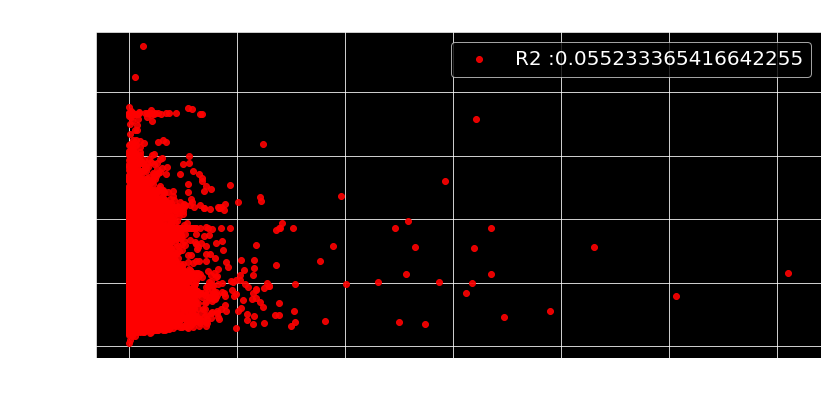

In [26]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.scatter(y= pd.DataFrame(y_hat),
                x=pd.DataFrame(y_val),
           color = 'red',
           alpha=0.9)
plt.title('Test 0 - Real vs Predicción')
plt.xlabel('y_val')
plt.ylabel('y_hat')
plt.legend(['R2 :{}'.format(str(r2_score(pd.DataFrame(y_val),
                                pd.DataFrame(y_hat))))],
           loc='upper right'
           )
plt.show()

In [27]:
sub_normalized = pd.DataFrame(x_val)
sub_normalized[7] = y_hat
sub_normalized

,0,1,2,3,4,5,6,7
0,0.2,0.002756,0.000000,0.555556,0.0,0.0,0.714286,0.000767
1,0.2,0.006648,0.006444,0.555556,0.0,0.0,0.857143,0.001055
2,0.2,0.003171,0.002904,0.555556,0.0,0.0,0.571429,0.000801
3,0.2,0.002869,0.002398,0.555556,0.0,0.0,1.000000,0.000862
4,0.2,0.006591,0.000000,1.000000,0.0,0.0,0.428571,0.000944
...,...,...,...,...,...,...,...,...
281661,0.4,0.011718,0.000000,1.000000,0.0,0.0,1.000000,0.001756
281662,0.2,0.002127,0.002966,0.555556,0.0,0.0,0.285714,0.000705
281663,0.2,0.005961,0.004659,0.555556,0.0,0.0,1.000000,0.001026
281664,0.2,0.002584,0.002892,0.555556,0.0,0.0,0.142857,0.000687


In [28]:
sub_desnorm = Estandar.inverse_transform(sub_normalized)
sub_desnorm = pd.DataFrame(sub_desnorm).iloc[:,-1]
sub_desnorm

0         434091.239490
1         596793.619313
2         453511.608965
3         487649.034823
4         534293.758335
              ...      
281661    993447.946427
281662    398936.945168
281663    580449.810542
281664    388839.802323
281665    492746.420675
Name: 7, Length: 281666, dtype: float64

In [29]:
sub_record = pd.DataFrame(id_cli.iloc[-281666:,])
sub_record.reset_index(inplace = True, drop =True)
sub_record.reset_index(inplace = True)
sub_gasto = pd.DataFrame(sub_desnorm)
sub_gasto.reset_index(inplace = True, drop =True)
sub_gasto.reset_index(inplace = True)
sub = pd.merge(sub_record,sub_gasto, on = 'index',how="left")
sub = sub.drop(columns=['index'], axis=0)
sub.columns = ['id_registro','gasto_familiar']
sub

,id_registro,gasto_familiar
0,4055#201902,434091.239490
1,12598#201902,596793.619313
2,23697#201902,453511.608965
3,23768#201902,487649.034823
4,7174#201902,534293.758335
...,...,...
281661,8596193#202011,993447.946427
281662,8616083#202011,398936.945168
281663,8670207#202011,580449.810542
281664,8677655#202011,388839.802323


In [30]:
n = 130
sub_name = "/mnt/workstation/data/Alomarrano/Sub/SubNN{}.csv".format(n)
sub_name

'/mnt/workstation/data/Alomarrano/Sub/SubNN130.csv'

In [31]:
np.mean(sub['gasto_familiar'])

675656.4897578366

In [32]:
sub.to_csv(sub_name, index=False)

# Test 1

In [33]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=5,
                    validation_data=(x_val,y_val),
                    verbose=0,
                   use_multiprocessing=True)

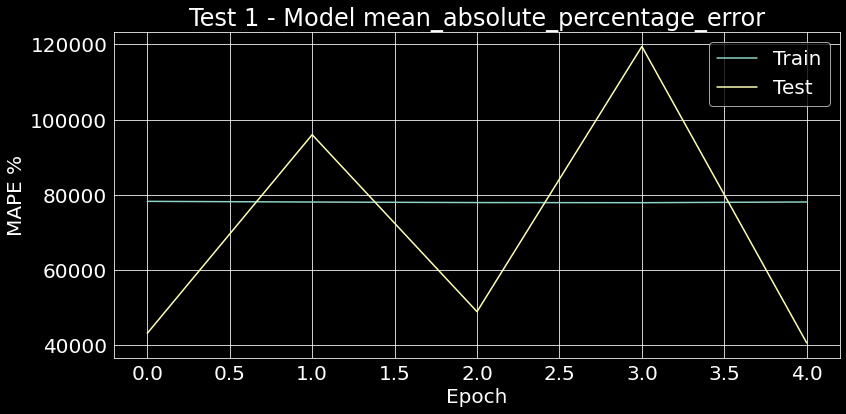

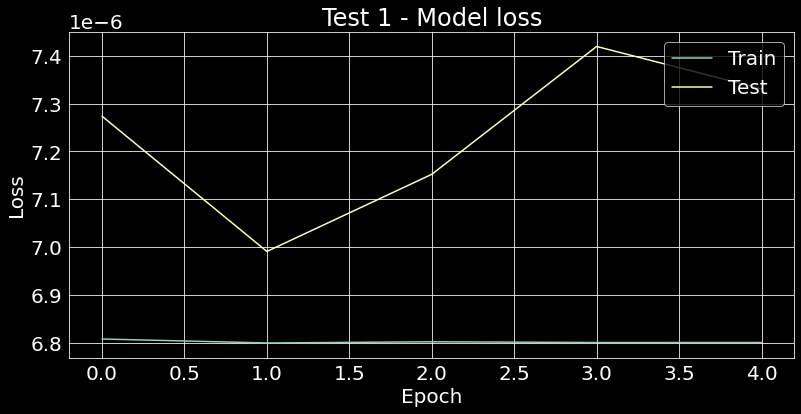

In [34]:
# Plot training & validation accuracy values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.style.use("dark_background")
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('Test 1 - Model mean_absolute_percentage_error')
plt.ylabel('MAPE %')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot training & validation loss values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test 1 - Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [35]:
results = model.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i],": ", results[i])

53610/53610 [==============================] - 41s 767us/step - loss: 6.2663e-06 - mean_absolute_percentage_error: 41166.7930
loss :  6.266304353630403e-06
mean_absolute_percentage_error :  41166.79296875


# Submission

In [36]:
y_hat = model.predict(x_val)
y_hat

array([[0.00032042],
       [0.00067313],
       [0.00039862],
       ...,
       [0.00059893],
       [0.0003633 ],
       [0.00043073]], dtype=float32)

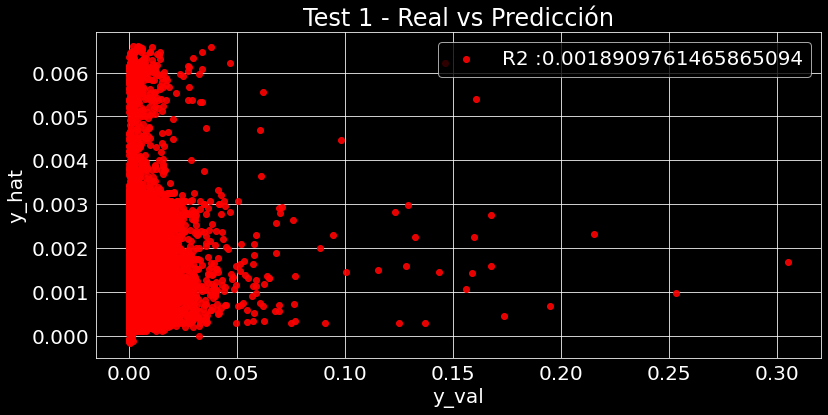

In [37]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.scatter(y= pd.DataFrame(y_hat),
                x=pd.DataFrame(y_val),
           color = 'red',
           alpha=0.9)
plt.title('Test 1 - Real vs Predicción')
plt.xlabel('y_val')
plt.ylabel('y_hat')
plt.legend(['R2 :{}'.format(str(r2_score(pd.DataFrame(y_val),
                                pd.DataFrame(y_hat))))],
           loc='upper right',
           )
plt.show()

In [38]:
sub_normalized = pd.DataFrame(x_val)
sub_normalized[7] = y_hat
sub_normalized

,0,1,2,3,4,5,6,7
0,0.2,0.002756,0.000000,0.555556,0.0,0.0,0.714286,0.000320
1,0.2,0.006648,0.006444,0.555556,0.0,0.0,0.857143,0.000673
2,0.2,0.003171,0.002904,0.555556,0.0,0.0,0.571429,0.000399
3,0.2,0.002869,0.002398,0.555556,0.0,0.0,1.000000,0.000371
4,0.2,0.006591,0.000000,1.000000,0.0,0.0,0.428571,0.000635
...,...,...,...,...,...,...,...,...
281661,0.4,0.011718,0.000000,1.000000,0.0,0.0,1.000000,0.001227
281662,0.2,0.002127,0.002966,0.555556,0.0,0.0,0.285714,0.000337
281663,0.2,0.005961,0.004659,0.555556,0.0,0.0,1.000000,0.000599
281664,0.2,0.002584,0.002892,0.555556,0.0,0.0,0.142857,0.000363


In [39]:
sub_desnorm = Estandar.inverse_transform(sub_normalized)
sub_desnorm = pd.DataFrame(sub_desnorm).iloc[:,-1]
sub_desnorm

0         181319.452196
1         380908.939769
2         225570.226499
3         209833.271336
4         359231.644046
              ...      
281661    694503.506067
281662    190666.526090
281663    338921.284098
281664    205580.289473
281665    243740.129714
Name: 7, Length: 281666, dtype: float64

In [40]:
sub_record = pd.DataFrame(id_cli.iloc[-281666:,])
sub_record.reset_index(inplace = True, drop =True)
sub_record.reset_index(inplace = True)
sub_gasto = pd.DataFrame(sub_desnorm)
sub_gasto.reset_index(inplace = True, drop =True)
sub_gasto.reset_index(inplace = True)
sub = pd.merge(sub_record,sub_gasto, on = 'index',how="left")
sub = sub.drop(columns=['index'], axis=0)
sub.columns = ['id_registro','gasto_familiar']
sub

,id_registro,gasto_familiar
0,4055#201902,181319.452196
1,12598#201902,380908.939769
2,23697#201902,225570.226499
3,23768#201902,209833.271336
4,7174#201902,359231.644046
...,...,...
281661,8596193#202011,694503.506067
281662,8616083#202011,190666.526090
281663,8670207#202011,338921.284098
281664,8677655#202011,205580.289473


In [41]:
n = 131
sub_name = "/mnt/workstation/data/Alomarrano/Sub/SubNN{}.csv".format(n)
sub_name

'/mnt/workstation/data/Alomarrano/Sub/SubNN131.csv'

In [42]:
np.mean(sub['gasto_familiar'])

412376.7180458657

In [43]:
sub.to_csv(sub_name, index=False)

# Test 2

In [44]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=50,
                    validation_data=(x_val,y_val),
                    verbose=0,
                   use_multiprocessing=True)


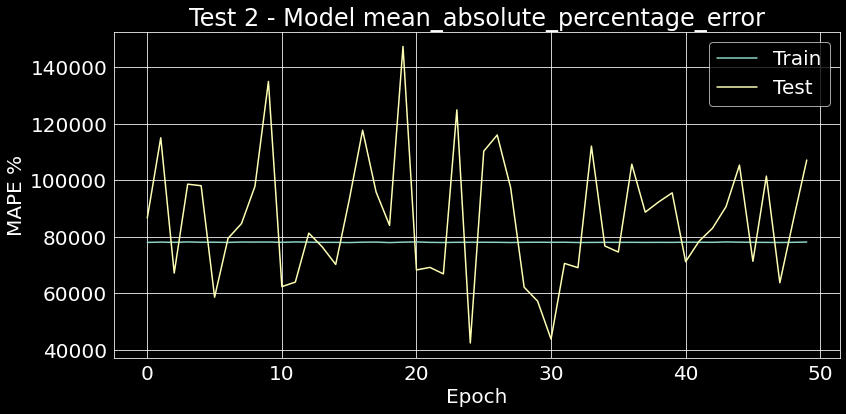

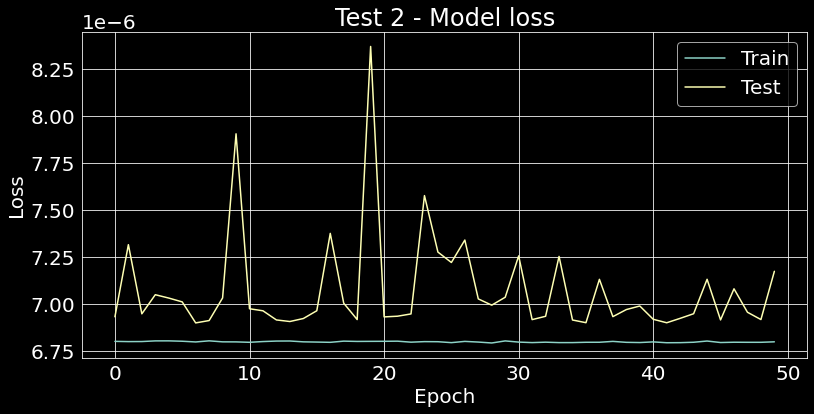

In [45]:
# Plot training & validation accuracy values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.style.use("dark_background")
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('Test 2 - Model mean_absolute_percentage_error')
plt.ylabel('MAPE %')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot training & validation loss values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test 2 - Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [46]:
results = model.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i],": ", results[i])

53610/53610 [==============================] - 41s 771us/step - loss: 6.1339e-06 - mean_absolute_percentage_error: 108010.7109
loss :  6.133864644652931e-06
mean_absolute_percentage_error :  108010.7109375


# Submission

In [47]:
y_hat = model.predict(x_val)
y_hat

array([[0.00139046],
       [0.00189926],
       [0.00149856],
       ...,
       [0.00184022],
       [0.00139738],
       [0.00159684]], dtype=float32)

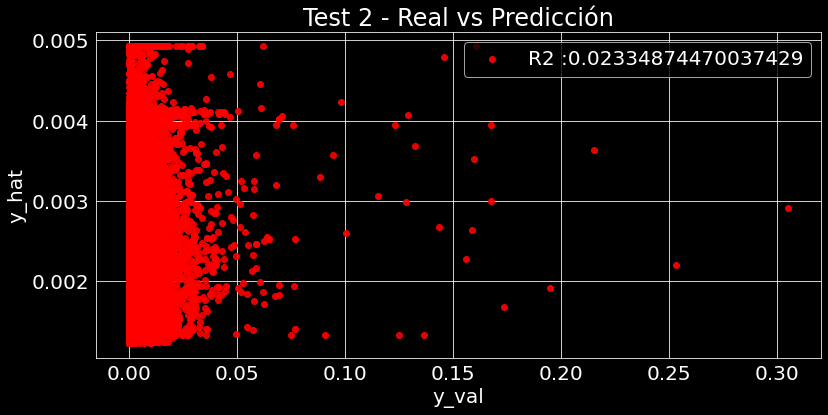

In [48]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.scatter(y= pd.DataFrame(y_hat),
                x=pd.DataFrame(y_val),
           color = 'red',
           alpha=0.9)
plt.title('Test 2 - Real vs Predicción')
plt.xlabel('y_val')
plt.ylabel('y_hat')
plt.legend(['R2 :{}'.format(str(r2_score(pd.DataFrame(y_val),
                                pd.DataFrame(y_hat))))],
           loc='upper right',
           )
plt.show()

In [49]:
sub_normalized = pd.DataFrame(x_val)
sub_normalized[7] = y_hat
sub_normalized

,0,1,2,3,4,5,6,7
0,0.2,0.002756,0.000000,0.555556,0.0,0.0,0.714286,0.001390
1,0.2,0.006648,0.006444,0.555556,0.0,0.0,0.857143,0.001899
2,0.2,0.003171,0.002904,0.555556,0.0,0.0,0.571429,0.001499
3,0.2,0.002869,0.002398,0.555556,0.0,0.0,1.000000,0.001492
4,0.2,0.006591,0.000000,1.000000,0.0,0.0,0.428571,0.001844
...,...,...,...,...,...,...,...,...
281661,0.4,0.011718,0.000000,1.000000,0.0,0.0,1.000000,0.002433
281662,0.2,0.002127,0.002966,0.555556,0.0,0.0,0.285714,0.001364
281663,0.2,0.005961,0.004659,0.555556,0.0,0.0,1.000000,0.001840
281664,0.2,0.002584,0.002892,0.555556,0.0,0.0,0.142857,0.001397


In [50]:
sub_desnorm = Estandar.inverse_transform(sub_normalized)
sub_desnorm = pd.DataFrame(sub_desnorm).iloc[:,-1]
sub_desnorm

0         7.868250e+05
1         1.074741e+06
2         8.479974e+05
3         8.442513e+05
4         1.043579e+06
              ...     
281661    1.376553e+06
281662    7.718046e+05
281663    1.041332e+06
281664    7.907400e+05
281665    9.036132e+05
Name: 7, Length: 281666, dtype: float64

In [51]:
sub_record = pd.DataFrame(id_cli.iloc[-281666:,])
sub_record.reset_index(inplace = True, drop =True)
sub_record.reset_index(inplace = True)
sub_gasto = pd.DataFrame(sub_desnorm)
sub_gasto.reset_index(inplace = True, drop =True)
sub_gasto.reset_index(inplace = True)
sub = pd.merge(sub_record,sub_gasto, on = 'index',how="left")
sub = sub.drop(columns=['index'], axis=0)
sub.columns = ['id_registro','gasto_familiar']
sub

,id_registro,gasto_familiar
0,4055#201902,7.868250e+05
1,12598#201902,1.074741e+06
2,23697#201902,8.479974e+05
3,23768#201902,8.442513e+05
4,7174#201902,1.043579e+06
...,...,...
281661,8596193#202011,1.376553e+06
281662,8616083#202011,7.718046e+05
281663,8670207#202011,1.041332e+06
281664,8677655#202011,7.907400e+05


In [52]:
n = 132
sub_name = "/mnt/workstation/data/Alomarrano/Sub/SubNN{}.csv".format(n)
sub_name

'/mnt/workstation/data/Alomarrano/Sub/SubNN132.csv'

In [53]:
np.mean(sub['gasto_familiar'])

1067113.607991423

In [54]:
sub.to_csv(sub_name, index=False)

# Test 3

In [55]:
import matplotlib.pyplot as plt

history = model.fit(X_train,
                    y_train,
                    batch_size=32,
                    epochs=75,
                    validation_data=(x_val,y_val),
                    verbose=0,
                   use_multiprocessing=True)


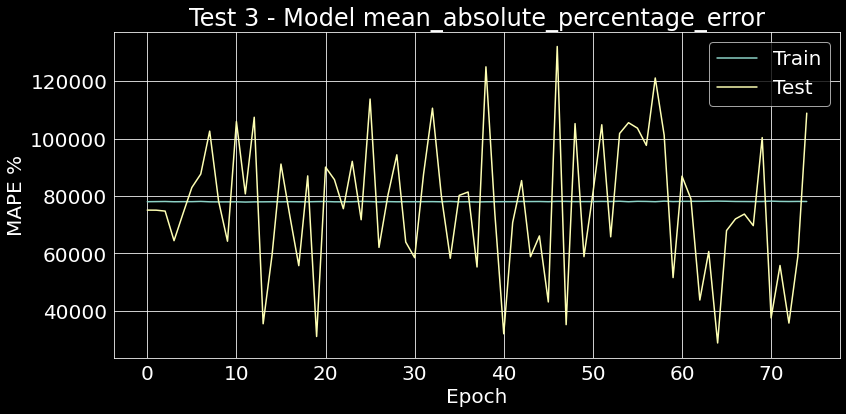

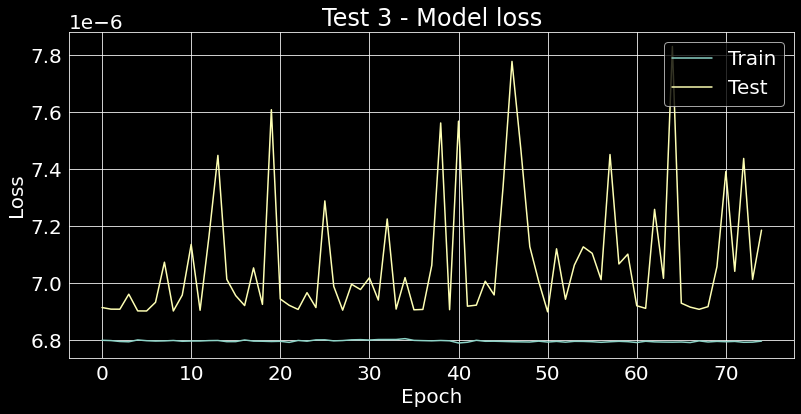

In [56]:
# Plot training & validation accuracy values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.style.use("dark_background")
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('Test 3 - Model mean_absolute_percentage_error')
plt.ylabel('MAPE %')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot training & validation loss values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test 3 - Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [57]:
results_h = model.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i],": ", results_h[i])

53610/53610 [==============================] - 41s 767us/step - loss: 6.1469e-06 - mean_absolute_percentage_error: 109748.69531s - loss: 6.1133e-06 - mean_absolu
loss :  6.146857231215108e-06
mean_absolute_percentage_error :  109748.6953125


## Submission

In [58]:
y_hat = model.predict(x_val)
y_hat

array([[0.00139662],
       [0.00199967],
       [0.00151608],
       ...,
       [0.00187865],
       [0.00144403],
       [0.00160203]], dtype=float32)

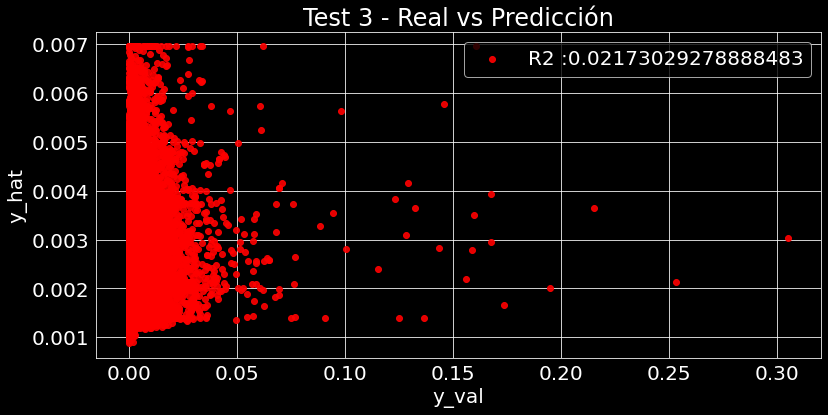

In [59]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.scatter(y= pd.DataFrame(y_hat),
                x=pd.DataFrame(y_val),
           color = 'red',
           alpha=0.9)
plt.title('Test 3 - Real vs Predicción')
plt.xlabel('y_val')
plt.ylabel('y_hat')
plt.legend(['R2 :{}'.format(str(r2_score(pd.DataFrame(y_val),
                                pd.DataFrame(y_hat))))],
           loc='upper right',
           )
plt.show()

In [60]:
sub_normalized = pd.DataFrame(x_val)
sub_normalized[7] = y_hat
sub_normalized

,0,1,2,3,4,5,6,7
0,0.2,0.002756,0.000000,0.555556,0.0,0.0,0.714286,0.001397
1,0.2,0.006648,0.006444,0.555556,0.0,0.0,0.857143,0.002000
2,0.2,0.003171,0.002904,0.555556,0.0,0.0,0.571429,0.001516
3,0.2,0.002869,0.002398,0.555556,0.0,0.0,1.000000,0.001475
4,0.2,0.006591,0.000000,1.000000,0.0,0.0,0.428571,0.001986
...,...,...,...,...,...,...,...,...
281661,0.4,0.011718,0.000000,1.000000,0.0,0.0,1.000000,0.002470
281662,0.2,0.002127,0.002966,0.555556,0.0,0.0,0.285714,0.001397
281663,0.2,0.005961,0.004659,0.555556,0.0,0.0,1.000000,0.001879
281664,0.2,0.002584,0.002892,0.555556,0.0,0.0,0.142857,0.001444


In [61]:
sub_desnorm = Estandar.inverse_transform(sub_normalized)
sub_desnorm = pd.DataFrame(sub_desnorm).iloc[:,-1]
sub_desnorm

0         7.903102e+05
1         1.131560e+06
2         8.579105e+05
3         8.347217e+05
4         1.123819e+06
              ...     
281661    1.397744e+06
281662    7.907961e+05
281663    1.063078e+06
281664    8.171396e+05
281665    9.065455e+05
Name: 7, Length: 281666, dtype: float64

In [62]:
sub_record = pd.DataFrame(id_cli.iloc[-281666:,])
sub_record.reset_index(inplace = True, drop =True)
sub_record.reset_index(inplace = True)
sub_gasto = pd.DataFrame(sub_desnorm)
sub_gasto.reset_index(inplace = True, drop =True)
sub_gasto.reset_index(inplace = True)
sub = pd.merge(sub_record,sub_gasto, on = 'index',how="left")
sub = sub.drop(columns=['index'], axis=0)
sub.columns = ['id_registro','gasto_familiar']
sub

,id_registro,gasto_familiar
0,4055#201902,7.903102e+05
1,12598#201902,1.131560e+06
2,23697#201902,8.579105e+05
3,23768#201902,8.347217e+05
4,7174#201902,1.123819e+06
...,...,...
281661,8596193#202011,1.397744e+06
281662,8616083#202011,7.907961e+05
281663,8670207#202011,1.063078e+06
281664,8677655#202011,8.171396e+05


In [63]:
n = 133
sub_name = "/mnt/workstation/data/Alomarrano/Sub/SubNN{}.csv".format(n)
sub_name

'/mnt/workstation/data/Alomarrano/Sub/SubNN133.csv'

In [64]:
np.mean(sub['gasto_familiar'])

1083740.9709700698

In [65]:
sub.to_csv(sub_name, index=False)

# Test 4

In [66]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=100,
                    validation_data=(x_val,y_val),
                    verbose=0,
                   use_multiprocessing=True)


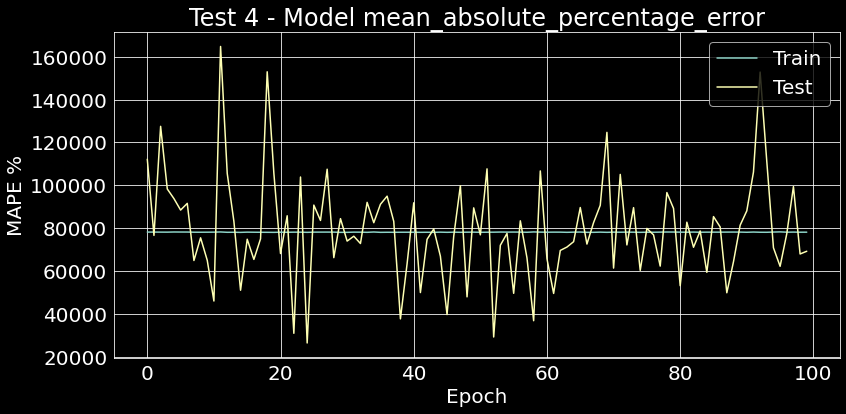

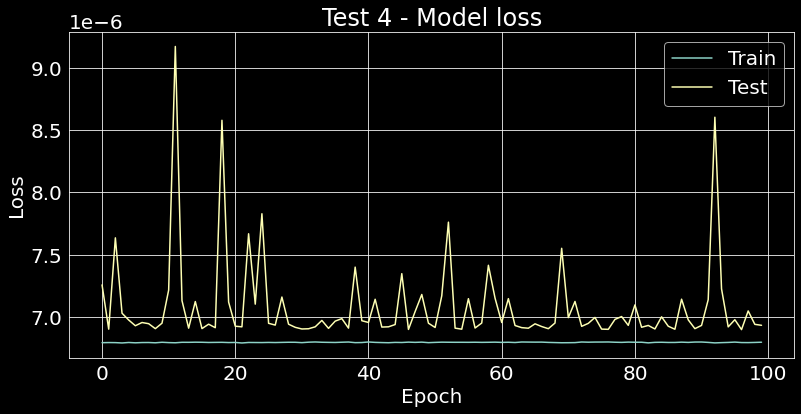

In [67]:
# Plot training & validation accuracy values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.style.use("dark_background")
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('Test 4 - Model mean_absolute_percentage_error')
plt.ylabel('MAPE %')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot training & validation loss values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test 4 - Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [68]:
results_3 = model.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i],": ", results_3[i])

53610/53610 [==============================] - 41s 768us/step - loss: 5.8800e-06 - mean_absolute_percentage_error: 69846.5469
loss :  5.879996479052352e-06
mean_absolute_percentage_error :  69846.546875


## Submission

In [69]:
y_hat = model.predict(x_val)
y_hat

array([[0.00070736],
       [0.00128973],
       [0.00082196],
       ...,
       [0.00118355],
       [0.00075505],
       [0.00091388]], dtype=float32)

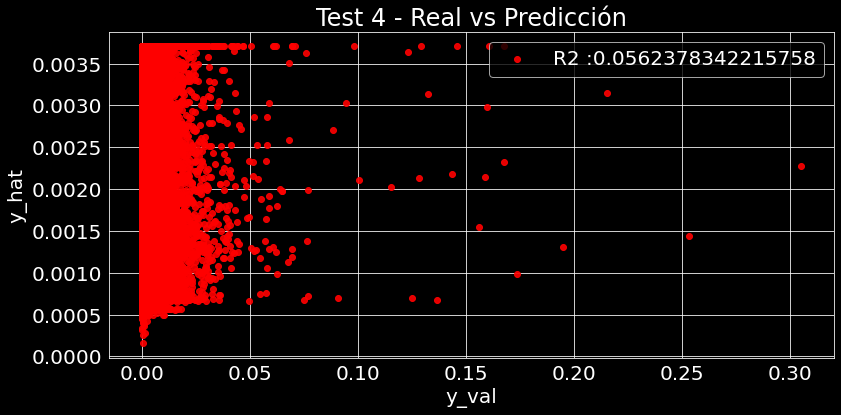

In [70]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.scatter(y= pd.DataFrame(y_hat),
                x=pd.DataFrame(y_val),
           color = 'red',
           alpha=0.9)
plt.title('Test 4 - Real vs Predicción')
plt.xlabel('y_val')
plt.ylabel('y_hat')
plt.legend(['R2 :{}'.format(str(r2_score(pd.DataFrame(y_val),
                                pd.DataFrame(y_hat))))],
           loc='upper right',
           )
plt.show()

In [71]:
sub_normalized = pd.DataFrame(x_val)
sub_normalized[7] = y_hat
sub_normalized

,0,1,2,3,4,5,6,7
0,0.2,0.002756,0.000000,0.555556,0.0,0.0,0.714286,0.000707
1,0.2,0.006648,0.006444,0.555556,0.0,0.0,0.857143,0.001290
2,0.2,0.003171,0.002904,0.555556,0.0,0.0,0.571429,0.000822
3,0.2,0.002869,0.002398,0.555556,0.0,0.0,1.000000,0.000797
4,0.2,0.006591,0.000000,1.000000,0.0,0.0,0.428571,0.001236
...,...,...,...,...,...,...,...,...
281661,0.4,0.011718,0.000000,1.000000,0.0,0.0,1.000000,0.001772
281662,0.2,0.002127,0.002966,0.555556,0.0,0.0,0.285714,0.000709
281663,0.2,0.005961,0.004659,0.555556,0.0,0.0,1.000000,0.001184
281664,0.2,0.002584,0.002892,0.555556,0.0,0.0,0.142857,0.000755


In [72]:
sub_desnorm = Estandar.inverse_transform(sub_normalized)
sub_desnorm = pd.DataFrame(sub_desnorm).iloc[:,-1]
sub_desnorm

0         4.002795e+05
1         7.298232e+05
2         4.651281e+05
3         4.507916e+05
4         6.995906e+05
              ...     
281661    1.002516e+06
281662    4.011119e+05
281663    6.697429e+05
281664    4.272613e+05
281665    5.171389e+05
Name: 7, Length: 281666, dtype: float64

In [73]:
sub_record = pd.DataFrame(id_cli.iloc[-281666:,])
sub_record.reset_index(inplace = True, drop =True)
sub_record.reset_index(inplace = True)
sub_gasto = pd.DataFrame(sub_desnorm)
sub_gasto.reset_index(inplace = True, drop =True)
sub_gasto.reset_index(inplace = True)
sub = pd.merge(sub_record,sub_gasto, on = 'index',how="left")
sub = sub.drop(columns=['index'], axis=0)
sub.columns = ['id_registro','gasto_familiar']
sub

,id_registro,gasto_familiar
0,4055#201902,4.002795e+05
1,12598#201902,7.298232e+05
2,23697#201902,4.651281e+05
3,23768#201902,4.507916e+05
4,7174#201902,6.995906e+05
...,...,...
281661,8596193#202011,1.002516e+06
281662,8616083#202011,4.011119e+05
281663,8670207#202011,6.697429e+05
281664,8677655#202011,4.272613e+05


In [74]:
n = 134
sub_name = "/mnt/workstation/data/Alomarrano/Sub/SubNN{}.csv".format(n)
sub_name

'/mnt/workstation/data/Alomarrano/Sub/SubNN134.csv'

In [75]:
np.mean(sub['gasto_familiar'])

695278.8013307218

In [76]:
sub.to_csv(sub_name, index=False)

# Test 5

In [77]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=150,
                    validation_data=(x_val,y_val),
                    verbose=0,
                   use_multiprocessing=True)



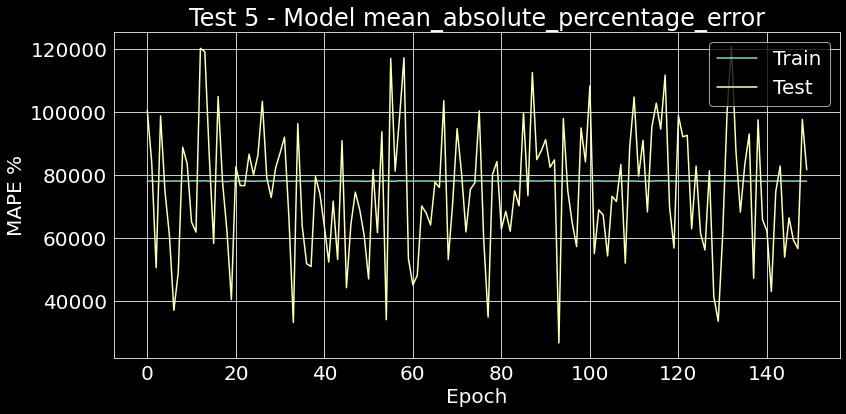

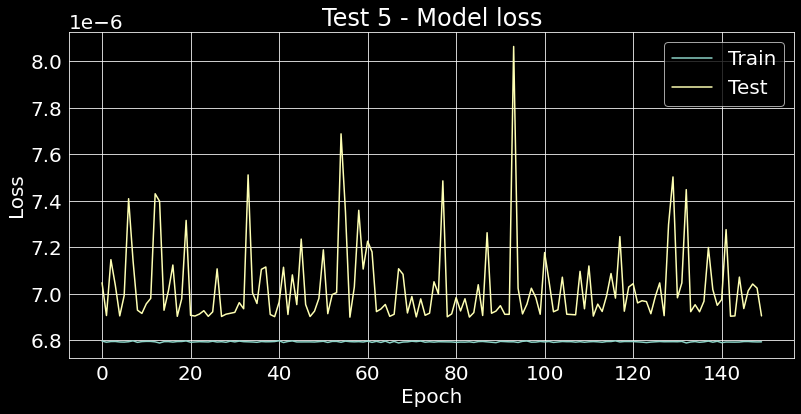

In [78]:
# Plot training & validation accuracy values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.style.use("dark_background")
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('Test 5 - Model mean_absolute_percentage_error')
plt.ylabel('MAPE %')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot training & validation loss values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test 5 - Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [79]:
results_3 = model.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i],": ", results_3[i])

53610/53610 [==============================] - 41s 768us/step - loss: 5.8563e-06 - mean_absolute_percentage_error: 82395.8438
loss :  5.856337338627782e-06
mean_absolute_percentage_error :  82395.84375


# Submission

In [80]:
y_hat = model.predict(x_val)
y_hat

array([[0.00095697],
       [0.00147796],
       [0.00105247],
       ...,
       [0.00138294],
       [0.00100783],
       [0.00114375]], dtype=float32)

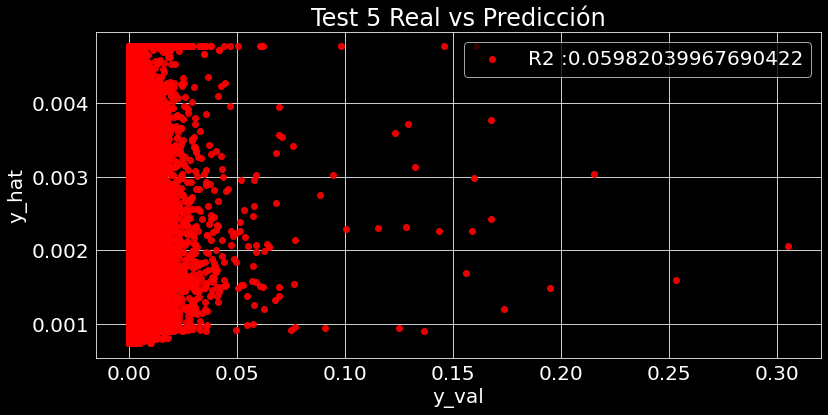

In [81]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.scatter(y= pd.DataFrame(y_hat),
                x=pd.DataFrame(y_val),
           color = 'red',
           alpha=0.9)
plt.title('Test 5 Real vs Predicción')
plt.xlabel('y_val')
plt.ylabel('y_hat')
plt.legend(['R2 :{}'.format(str(r2_score(pd.DataFrame(y_val),
                                pd.DataFrame(y_hat))))],
           loc='upper right',
           )
plt.show()

In [82]:
sub_normalized = pd.DataFrame(x_val)
sub_normalized[7] = y_hat
sub_normalized

,0,1,2,3,4,5,6,7
0,0.2,0.002756,0.000000,0.555556,0.0,0.0,0.714286,0.000957
1,0.2,0.006648,0.006444,0.555556,0.0,0.0,0.857143,0.001478
2,0.2,0.003171,0.002904,0.555556,0.0,0.0,0.571429,0.001052
3,0.2,0.002869,0.002398,0.555556,0.0,0.0,1.000000,0.001035
4,0.2,0.006591,0.000000,1.000000,0.0,0.0,0.428571,0.001495
...,...,...,...,...,...,...,...,...
281661,0.4,0.011718,0.000000,1.000000,0.0,0.0,1.000000,0.001903
281662,0.2,0.002127,0.002966,0.555556,0.0,0.0,0.285714,0.000960
281663,0.2,0.005961,0.004659,0.555556,0.0,0.0,1.000000,0.001383
281664,0.2,0.002584,0.002892,0.555556,0.0,0.0,0.142857,0.001008


In [83]:
sub_desnorm = Estandar.inverse_transform(sub_normalized)
sub_desnorm = pd.DataFrame(sub_desnorm).iloc[:,-1]
sub_desnorm

0         5.415228e+05
1         8.363397e+05
2         5.955641e+05
3         5.858847e+05
4         8.462015e+05
              ...     
281661    1.076629e+06
281662    5.431398e+05
281663    7.825686e+05
281664    5.703023e+05
281665    6.472212e+05
Name: 7, Length: 281666, dtype: float64

In [84]:
sub_record = pd.DataFrame(id_cli.iloc[-281666:,])
sub_record.reset_index(inplace = True, drop =True)
sub_record.reset_index(inplace = True)
sub_gasto = pd.DataFrame(sub_desnorm)
sub_gasto.reset_index(inplace = True, drop =True)
sub_gasto.reset_index(inplace = True)
sub = pd.merge(sub_record,sub_gasto, on = 'index',how="left")
sub = sub.drop(columns=['index'], axis=0)
sub.columns = ['id_registro','gasto_familiar']
sub

,id_registro,gasto_familiar
0,4055#201902,5.415228e+05
1,12598#201902,8.363397e+05
2,23697#201902,5.955641e+05
3,23768#201902,5.858847e+05
4,7174#201902,8.462015e+05
...,...,...
281661,8596193#202011,1.076629e+06
281662,8616083#202011,5.431398e+05
281663,8670207#202011,7.825686e+05
281664,8677655#202011,5.703023e+05


In [85]:
n = 135
sub_name = "/mnt/workstation/data/Alomarrano/Sub/SubNN{}.csv".format(n)
sub_name

'/mnt/workstation/data/Alomarrano/Sub/SubNN135.csv'

In [86]:
np.mean(sub['gasto_familiar'])

815472.8007048833

In [87]:
sub.to_csv(sub_name, index=False)